# Önkutfel próbálgatás


## Tensorflow kiprobalas
https://www.geeksforgeeks.org/stock-price-prediction-project-using-tensorflow/?fbclid=IwAR2xtggHXMhypvTXANI6spQ7fTBlaR3Te43Ea-Y37pOVbLnx-DjgigIesCs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./egyesitett.csv')

In [3]:
data # $ jeleket el kellene tuntetni

,Date,Close/Last,Volume,Open,High,Low,Name
0,10/19/2023,$128.40,60961360,$130.57,$132.24,$127.47,AMZN
1,10/18/2023,$128.13,42699480,$129.90,$130.67,$127.51,AMZN
2,10/17/2023,$131.47,49344550,$130.39,$132.58,$128.71,AMZN
3,10/16/2023,$132.55,42832920,$130.69,$133.07,$130.43,AMZN
4,10/13/2023,$129.79,45824690,$132.98,$133.31,$128.95,AMZN
...,...,...,...,...,...,...,...
12580,10/25/2013,$11.31,113661738,$11.61,$11.63,$11.12,TSLA
12581,10/24/2013,$11.54,161740419,$11.00,$11.63,$10.86,TSLA
12582,10/23/2013,$10.97,199788950,$11.26,$11.45,$10.68,TSLA
12583,10/22/2013,$11.44,170788865,$11.37,$11.85,$11.07,TSLA


In [4]:
data = data.rename(columns={'Close/Last': 'Close'})
data['Open'] = pd.to_numeric(data['Open'].str.replace('$', ''))
data['Close'] = pd.to_numeric(data['Close'].str.replace('$', ''))
data['High'] = pd.to_numeric(data['High'].str.replace('$', ''))
data['Low'] = pd.to_numeric(data['Low'].str.replace('$', ''))
data
data.to_csv('./egyesitett_jo.csv', index=False)

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12585 entries, 0 to 12584
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12585 non-null  datetime64[ns]
 1   Close   12585 non-null  float64       
 2   Volume  12585 non-null  int64         
 3   Open    12585 non-null  float64       
 4   High    12585 non-null  float64       
 5   Low     12585 non-null  float64       
 6   Name    12585 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 688.4+ KB


,Date,Close,Volume,Open,High,Low,Name
0,2023-10-19,128.40,60961360,130.57,132.24,127.47,AMZN
1,2023-10-18,128.13,42699480,129.90,130.67,127.51,AMZN
2,2023-10-17,131.47,49344550,130.39,132.58,128.71,AMZN
3,2023-10-16,132.55,42832920,130.69,133.07,130.43,AMZN
4,2023-10-13,129.79,45824690,132.98,133.31,128.95,AMZN
...,...,...,...,...,...,...,...
12580,2013-10-25,11.31,113661738,11.61,11.63,11.12,TSLA
12581,2013-10-24,11.54,161740419,11.00,11.63,10.86,TSLA
12582,2013-10-23,10.97,199788950,11.26,11.45,10.68,TSLA
12583,2013-10-22,11.44,170788865,11.37,11.85,11.07,TSLA


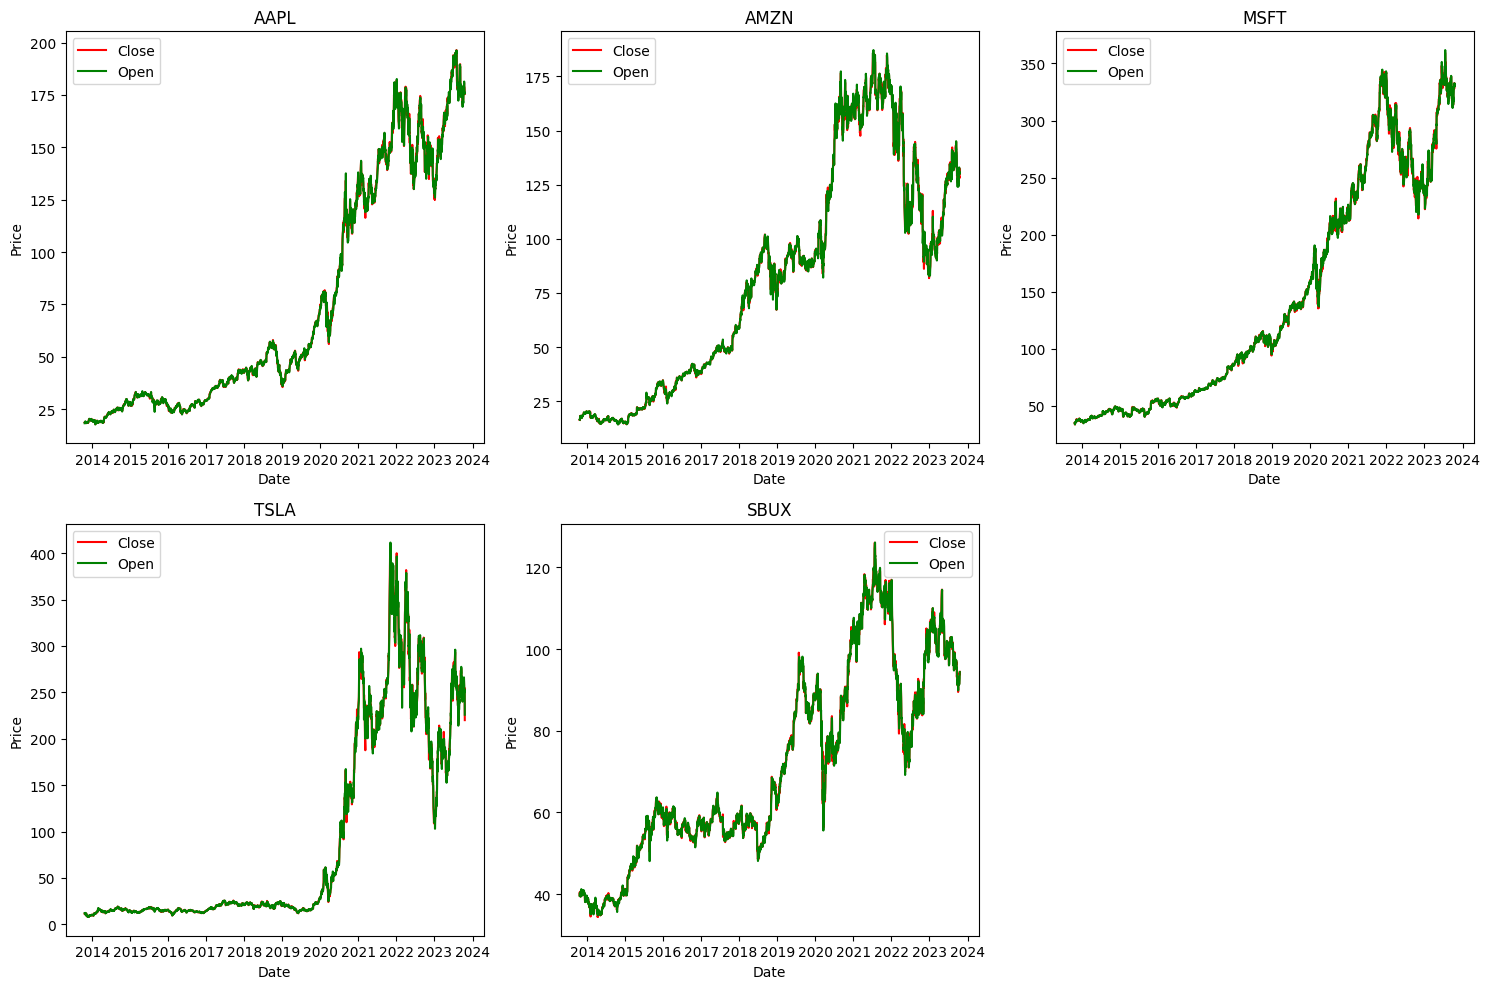

In [6]:
data = data.sort_values(by='Date')
companies = ['AAPL','AMZN','MSFT','TSLA','SBUX']
plt.figure(figsize=(15, 10))
for index, company in enumerate(companies, 1):
    plt.subplot(2, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['Date'], c['Close'], c="r", label="Close")
    plt.plot(c['Date'], c['Open'], c="g", label="Open")
    plt.title(company)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()

plt.show()

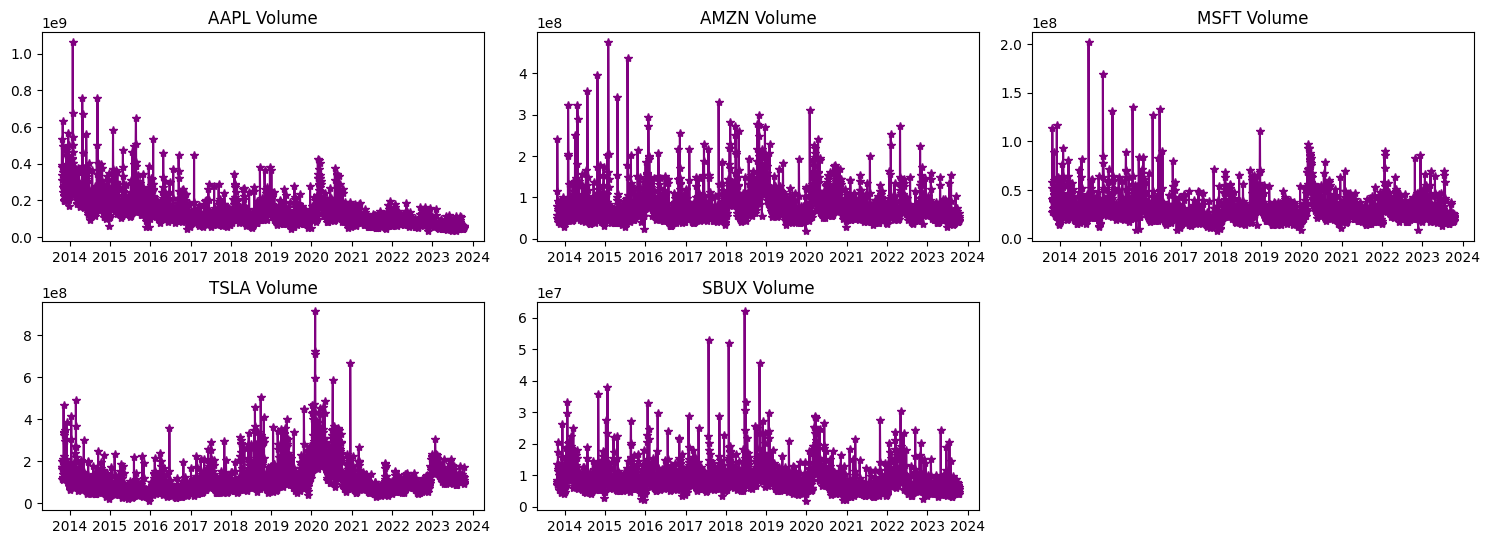

In [7]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['Date'], c['Volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

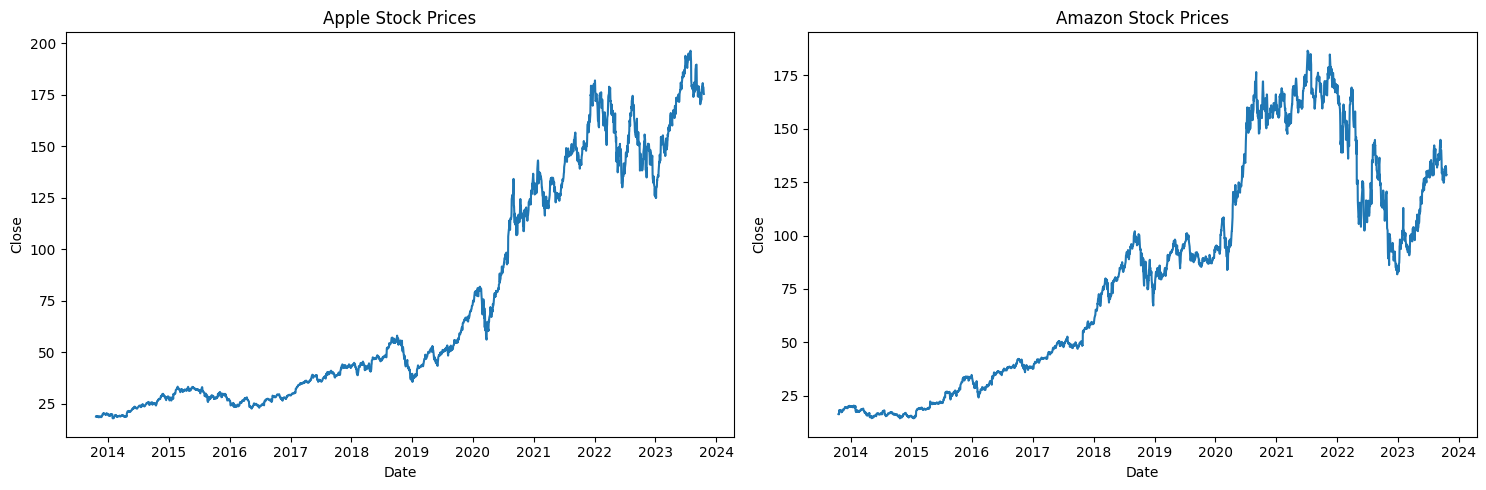

In [8]:
apple = data[data['Name'] == 'AAPL']
#prediction_range = apple.loc[(apple['Date'] > datetime(2013,1,1))
# & (apple['Date']<datetime(2018,1,1))]

amazon = data[data['Name']== 'AMZN']
plt.figure(figsize=(15, 5))

# Plot for Apple
plt.subplot(1, 2, 1)
plt.plot(apple['Date'], apple['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")

# Plot for Amazon
plt.subplot(1, 2, 2)
plt.plot(amazon['Date'], amazon['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Amazon Stock Prices")

plt.tight_layout()
plt.show()

In [9]:
#Apple
close_data = apple.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95)) #az adatok 95%-a a Training Data (5% Test halmaz)

#Amazon
close_data_AMZN = amazon.filter(['Close'])
dataset_AMZN = close_data_AMZN.values
training_AMZN = int(np.ceil(len(dataset_AMZN)* .95))

print(training) #ennyi db adatunk van (ez mindegyiknel ugyanannyi, hiszen napi 1 adat van, az idointervallum pedig megegyezik)
print(training_AMZN) 

2392
2392


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) # atskalazzuk az tanitoadatokat, hogy a modell jobban tudja kezelni (MinMax erre tokeletes)

#Apple
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []
 
for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) # 60 tanítóadat 
    y_train.append(train_data[i, 0]) # 61. adat pedig label

x_train, y_train = np.array(x_train), np.array(y_train) #atalakitjuk hogy numpy arrey legyen  
x_train = np.reshape(x_train, (x_train.shape[0],1, x_train.shape[1])) 
#LSTM layernek 3D-s adat (vektor) szükséges bemenetnek, ezért átalakítjuk az adatokat, így megfelelő lesz a bemenet

#Amazon
scaled_data_AMZN = scaler.fit_transform(dataset_AMZN)
train_data_AMZN = scaled_data_AMZN[0:int(training_AMZN), :]
x_train_AMZN = []
y_train_AMZN = []
 
for i in range(60, len(train_data_AMZN)):
    x_train_AMZN.append(train_data[i-60:i, 0])
    y_train_AMZN.append(train_data[i, 0])
 
x_train_AMZN, y_train_AMZN = np.array(x_train_AMZN), np.array(y_train_AMZN)
x_train_AMZN = np.reshape(x_train_AMZN, (x_train_AMZN.shape[0], 1, x_train_AMZN.shape[1]))

In [11]:
#Inicializaljuk a modellunket:
#Apple
model = keras.models.Sequential()
# 2db LSTM réteget hozunk létre (LSTM: Long-Short Term Memory)
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             32000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 67137 (262.25 KB)
Trainable params: 67137 (262.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#Amazon
modelAMZN = keras.models.Sequential()
modelAMZN.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train_AMZN.shape[1], x_train_AMZN.shape[2])))  
modelAMZN.add(keras.layers.LSTM(units=64))
modelAMZN.add(keras.layers.Dense(32))
modelAMZN.add(keras.layers.Dropout(0.5))
modelAMZN.add(keras.layers.Dense(1))
modelAMZN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             32000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 67137 (262.25 KB)
Trainable params: 67137 (262.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#APPL
model.compile(optimizer='adam',
              loss='mean_squared_error') 
history = model.fit(x_train,
                    y_train,
                    epochs=25)
model.save('model_aapl.h5')


Epoch 1/25

73/73 [==============================] - 3s 2ms/step - loss: 0.0226
Epoch 2/25
73/73 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 3/25
73/73 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 4/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 5/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 6/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 7/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 8/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 9/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 10/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 11/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 12/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 13/25
73/73 [============================

In [14]:
#AMZN
modelAMZN.compile(optimizer='adam',
              loss='mean_squared_error')
history_AMZN = modelAMZN.fit(x_train_AMZN,
                    y_train_AMZN,
                    epochs=25)
model.save('model_amzn.h5')

Epoch 1/25
73/73 [==============================] - 3s 2ms/step - loss: 0.0266
Epoch 2/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 3/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 4/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 5/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 6/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 7/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 8/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 9/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 10/25
73/73 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 11/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 12/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 13/25
73/73 [==============================

In [15]:
#AAPL
test_data = scaled_data[training - 60:, :] 
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test = np.swapaxes(x_test, 1, 2)
 
# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

4/4 [==============================] - 1s 3ms/step
MSE 51.78146389835847
RMSE 7.195933844773621


In [16]:
#AMZN
test_data_AMZN = scaled_data_AMZN[training_AMZN - 60:, :]
x_test_AMZN = []
y_test_AMZN = dataset_AMZN[training_AMZN:, :]
for i in range(60, len(test_data_AMZN)):
    x_test_AMZN.append(test_data_AMZN[i-60:i, 0])
 
x_test_AMZN = np.array(x_test_AMZN)
x_test_AMZN = np.reshape(x_test_AMZN, (x_test_AMZN.shape[0], x_test_AMZN.shape[1], 1))
x_test_AMZN = np.swapaxes(x_test_AMZN, 1, 2)
 
# predict the testing data
predictions_AMZN = modelAMZN.predict(x_test_AMZN)
predictions_AMZN = scaler.inverse_transform(predictions_AMZN)

# evaluation metrics
mse_AMZN = np.mean(((predictions_AMZN - y_test_AMZN) ** 2))
print("MSE_AMZN", mse_AMZN)
print("RMSE_AMZN", np.sqrt(mse_AMZN))


4/4 [==============================] - 1s 3ms/step
MSE_AMZN 16.52261908255981
RMSE_AMZN 4.064802465380059


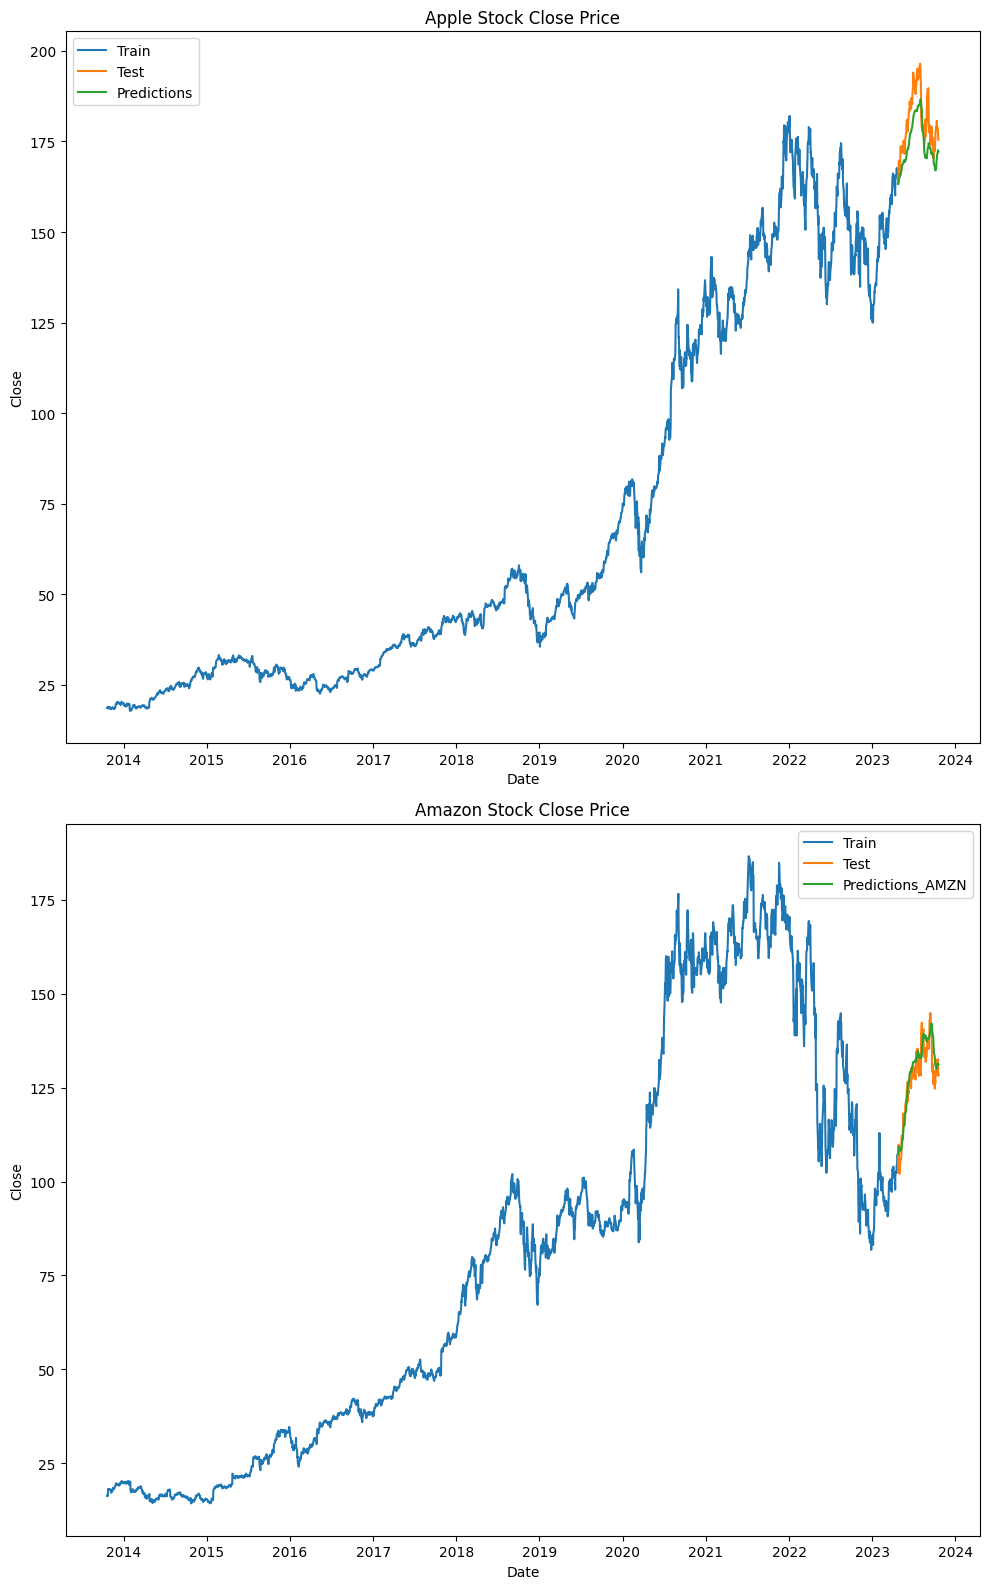

In [17]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

train_AMZN = amazon[:training_AMZN]
test_AMZN = amazon[training_AMZN:]
test_AMZN['Predictions_AMZN'] = predictions_AMZN

# Plot for Apple
plt.figure(figsize=(10, 16))  

# Subplot for Apple training and testing
plt.subplot(2, 1, 1)
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

# Plot for Amazon
plt.subplot(2, 1, 2)
plt.plot(train_AMZN['Date'], train_AMZN['Close'])
plt.plot(test_AMZN['Date'], test_AMZN[['Close', 'Predictions_AMZN']])
plt.title('Amazon Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions_AMZN'])

plt.tight_layout()  
plt.show()


## masik machine learning cikk
(https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/?fbclid=IwAR3edNmD1SPTc4Fqkb8AO80FzXR1h6T7rzPC9_EhuyPLfr-AfvAr_i_Jrm4)

In [18]:
# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler 
from keras.layers import LSTM, Dense, Dropout  
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates  
from sklearn import linear_model
from keras.models import Sequential  
from keras.layers import Dense
import keras.backend as K  
from keras.callbacks import EarlyStopping  
from keras.optimizers import Adam  
from keras.models import load_model  
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model #2.3.0 ota kerasban van
from IPython.display import Image
import plotly.graph_objects as go
import pydotplus

In [50]:
def plot_model_with_plotly(model):
    return go.Figure(go.Model.from_keras(model))

In [55]:
df=pd.read_csv('./egyesitett_jo.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df = df[df['Name']== 'AMZN']
df.head()

,Close,Volume,Open,High,Low,Name
Date,,,,,,
2023-10-19,128.40,60961360,130.57,132.24,127.47,AMZN
2023-10-18,128.13,42699480,129.90,130.67,127.51,AMZN
2023-10-17,131.47,49344550,130.39,132.58,128.71,AMZN
2023-10-16,132.55,42832920,130.69,133.07,130.43,AMZN
2023-10-13,129.79,45824690,132.98,133.31,128.95,AMZN


In [56]:
df = df.iloc[::-1]

Dataframe Shape:  (2517, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

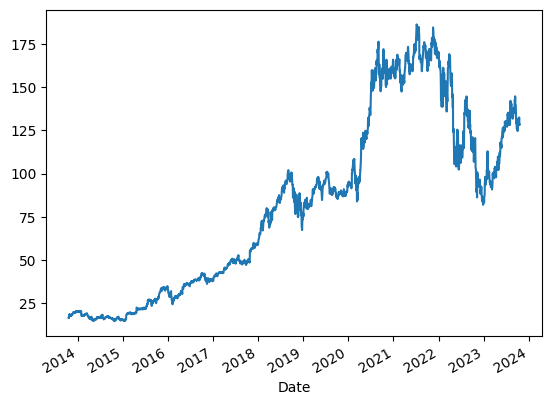

In [57]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any()) #ezt tudtuk
df['Close'].plot()

In [58]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']
output_var_scaler = MinMaxScaler()
output_var_scaled = output_var_scaler.fit_transform(output_var)

In [59]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2013-10-21,0.013123,0.011371,0.011662,0.071437
2013-10-22,0.012545,0.013438,0.012189,0.132678
2013-10-23,0.013412,0.011888,0.011721,0.083763
2013-10-24,0.013065,0.012117,0.012541,0.209788
2013-10-25,0.021448,0.022397,0.020101,0.485665


In [60]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var_scaled[:len(train_index)].ravel(), output_var_scaled[len(train_index): (len(train_index)+len(test_index))].ravel()

In [61]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [62]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                17664     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17729 (69.25 KB)
Trainable params: 17729 (69.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
287/287 [==============================] - 1s 1ms/step - loss: 3.1639e-04
Epoch 2/100
287/287 [==============================] - 0s 1ms/step - loss: 9.5060e-04
Epoch 3/100
287/287 [==============================] - 0s 1ms/step - loss: 5.2109e-04
Epoch 4/100
287/287 [==============================] - 0s 1ms/step - loss: 3.0779e-04
Epoch 5/100
287/287 [==============================] - 0s 1ms/step - loss: 2.1354e-04
Epoch 6/100
287/287 [==============================] - 0s 1ms/step - loss: 1.6822e-04
Epoch 7/100
287/287 [==============================] - 0s 1ms/step - loss: 1.4318e-04
Epoch 8/100
287/287 [==============================] - 0s 1ms/step - loss: 1.2663e-04
Epoch 9/100
287/287 [==============================] - 0s 1ms/step - loss: 1.1491e-04
Epoch 10/100
287/287 [==============================] - 0s 1ms/step - loss: 1.0528e-04
Epoch 11/100
287/287 [==============================] - 0s 1ms/step - loss: 9.8544e-05
Epoch 12/100
287/287 [==============================

In [64]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [65]:
y_pred
original_scale_y_pred = output_var_scaler.inverse_transform(y_pred)
original_scale_y_test = output_var_scaler.inverse_transform(y_test.reshape(-1,1))
original_scale_y_train = output_var_scaler.inverse_transform(y_train.reshape(-1,1))

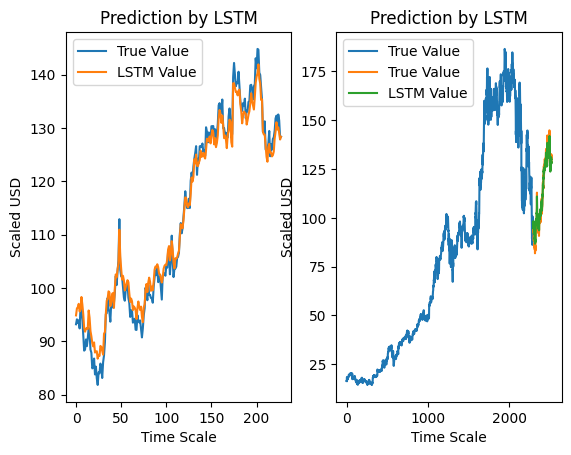

In [66]:
#Predicted vs True Adj Close Value – LSTM
plt.subplot(1, 2, 1)
plt.plot(original_scale_y_test, label='True Value')
plt.plot(original_scale_y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()

start_value = len(y_train)
x_values = np.arange(start_value, start_value + len(original_scale_y_pred))

plt.subplot(1, 2, 2)
plt.plot(original_scale_y_train, label='True Value')
plt.plot(x_values, original_scale_y_test, label='True Value')
plt.plot(x_values, original_scale_y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()

plt.show()